In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys,os
sys.path.append('..')
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
from backtester.swarms.swarm import Swarm
from backtester.exoinfo import EXOInfo
from exobuilder.data.exostorage import EXOStorage


import pandas as pd
import numpy as np
import scipy
import pprint

In [3]:
# Loading global setting for MongoDB etc.
from scripts.settings import *

try:
    from scripts.settings_local import *
except:
    pass

In [4]:
storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)

## List of available products in Mongo

In [5]:
swm_info = storage.swarms_info()
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(swm_info)

{   '_id': None,
    'alphas': [   'RenkoPatternsNoExits',
                  'SwingPoint',
                  'EXO',
                  'PointAndFigure',
                  'IchimokuCloud',
                  'MACross',
                  'BolllingerBands'],
    'exo_types': [   'CallSpread',
                     'PutSpread',
                     'ContFut',
                     'BullishCollarBW',
                     'BearishCollarBW'],
    'instruments': ['ZC', 'NG', 'ZN', 'ES', 'ZS', 'CL', 'ZW']}


## Getting swarm using filter

In [6]:
instruments_filter = ['ZC']  # Select ALL
#instruments_filter = ['ES', 'CL']

exo_filter = ['*'] # Select ALL
#exo_filter = ['BullishCollar']

direction_filter = [0, -1, 1] # Select ALL
#direction_filter = [1]

alpha_filter = ['*']  # Select ALL
#alpha_filter = ['MaCross', 'PointAndFigurePatterns']

swmdf, swm_data = storage.swarms_list(instruments_filter, direction_filter, alpha_filter, exo_filter)

## Swarms loaded

In [7]:
[print(s) for s in sorted(swmdf.columns)];

ZC_BearishCollarBW_Long_EXO
ZC_BearishCollarBW_Short_EXO
ZC_BullishCollarBW_Long_EXO
ZC_BullishCollarBW_Short_EXO
ZC_CallSpread_Long_BolllingerBands_bullish-custom
ZC_CallSpread_Long_EXO
ZC_CallSpread_Long_IchimokuCloud_alt2-bullish-custom
ZC_CallSpread_Long_IchimokuCloud_bullish-custom
ZC_CallSpread_Long_SwingPoint_bullish-custom
ZC_CallSpread_Short_EXO
ZC_CallSpread_Short_IchimokuCloud_bearish-custom
ZC_CallSpread_Short_IchimokuCloud_bullish-custom
ZC_CallSpread_Short_MACross_bearish-custom
ZC_ContFut_Long_EXO
ZC_ContFut_Short_EXO
ZC_PutSpread_Long_BolllingerBands_alt2-bearish-custom
ZC_PutSpread_Long_BolllingerBands_bearish-custom
ZC_PutSpread_Long_EXO
ZC_PutSpread_Long_IchimokuCloud_bearish-custom
ZC_PutSpread_Long_MACross_bearish-custom
ZC_PutSpread_Short_BolllingerBands_bullish-custom
ZC_PutSpread_Short_EXO


### Swarms equities

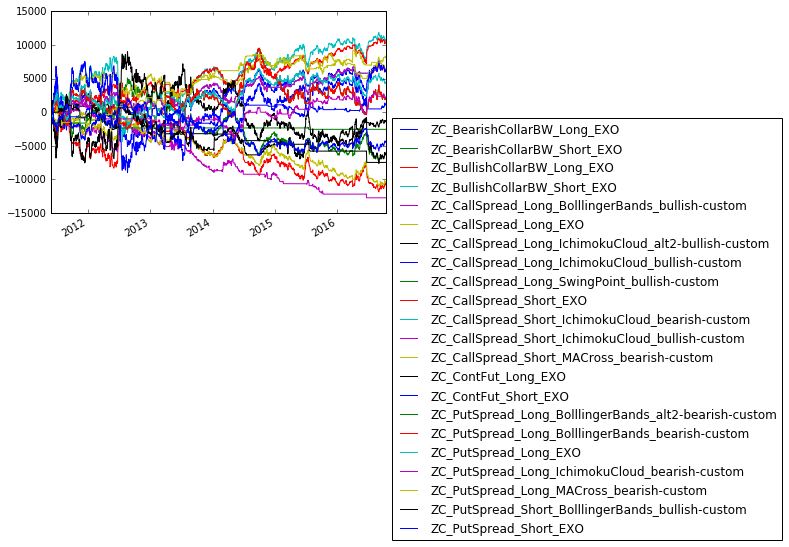

In [8]:
swmdf.plot().legend(loc='best', bbox_to_anchor=(1, 0.5));

## Individual swarm equity

#_swarm_name = "ES_BullishCollarBW_Long_BollingerBands"
_swarm_name = "CL_CallSpread_Short_SwingPoint_bullish-custom"
_swarm_name = "CL_PutSpread_Long_BollingerBands_bullish-custom"
_swarm_name = "CL_PutSpread_Long_IchimokuCloud_bullish-custom"
_swarm_name = "CL_PutSpread_Long_RenkoPatterns_no_exit_on_patterns_bullish-custom"


     

swmdf[_swarm_name].plot();
title(_swarm_name);

### Available products EXOs

In [9]:
passive_exo = {}

exo_filter = '*'     # All 
#exo_filter = 'ES_'  # ES only
exo_filter = 'ZC'  # ES Collars (incl Bearish, Bullish, BW and vanilla)


print('==== Passive EXO list')
for exo_name in storage.exo_list(exo_filter):
    passive_exo[exo_name], exo_dict = storage.load_series(exo_name)

for exo in sorted(passive_exo.keys()):
    print(exo)
    
print('==== Alphas EXO list')
[print(s) for s in sorted(swmdf.columns)];

==== Passive EXO list
ZC_BearishCollarBW
ZC_BullishCollarBW
ZC_CallSpread
ZC_ContFut
ZC_PutSpread
==== Alphas EXO list
ZC_BearishCollarBW_Long_EXO
ZC_BearishCollarBW_Short_EXO
ZC_BullishCollarBW_Long_EXO
ZC_BullishCollarBW_Short_EXO
ZC_CallSpread_Long_BolllingerBands_bullish-custom
ZC_CallSpread_Long_EXO
ZC_CallSpread_Long_IchimokuCloud_alt2-bullish-custom
ZC_CallSpread_Long_IchimokuCloud_bullish-custom
ZC_CallSpread_Long_SwingPoint_bullish-custom
ZC_CallSpread_Short_EXO
ZC_CallSpread_Short_IchimokuCloud_bearish-custom
ZC_CallSpread_Short_IchimokuCloud_bullish-custom
ZC_CallSpread_Short_MACross_bearish-custom
ZC_ContFut_Long_EXO
ZC_ContFut_Short_EXO
ZC_PutSpread_Long_BolllingerBands_alt2-bearish-custom
ZC_PutSpread_Long_BolllingerBands_bearish-custom
ZC_PutSpread_Long_EXO
ZC_PutSpread_Long_IchimokuCloud_bearish-custom
ZC_PutSpread_Long_MACross_bearish-custom
ZC_PutSpread_Short_BolllingerBands_bullish-custom
ZC_PutSpread_Short_EXO


# Campaign composition

Copy/paste EXO or swarm names to the 'campaign_exposure' dictionary from lists above

In [37]:
campaign_exposure = {
         
    'ZC_CallSpread_Long_BolllingerBands_bullish-custom ': 1, 
     'ZC_CallSpread_Long_IchimokuCloud_alt2-bullish-custom ': 1, 
    'ZC_CallSpread_Long_IchimokuCloud_bullish-custom': 1,  
    'ZC_CallSpread_Long_SwingPoint_bullish-custom': 1, 
     'ZC_CallSpread_Short_IchimokuCloud_bullish-custom': 1, 
    'ZC_PutSpread_Short_BolllingerBands_bullish-custom': 1,

        

    
     #
     # Passive EXO positions
     #
     'ZC_PutSpread': 1, # Short 1 EXO units
     
}

In [38]:
#def campaign_equity(swarms, exposure):

campaign_dict = {}
campaign_stats = {'NetProfit': 0.0, 'TradesCount': 0, 'CommissionSum': 0.0}

for camp_name, exposure in campaign_exposure.items():
    if camp_name in swmdf:
        swarm_name = camp_name
        campaign_dict[swarm_name] = swmdf[swarm_name] * exposure
        
        # TODO: implement swarm statistics
        '''
        s = smgr.picked_stats        
        campaign_stats['NetProfit'] += s['NetProfit']
        campaign_stats['TradesCount'] += s['TradesCount']
        campaign_stats['CommissionSum'] += s['CommissionSum']
        '''
        
    elif camp_name in passive_exo:
        exo_equity = passive_exo[camp_name]
        campaign_dict[camp_name] = exo_equity.diff() * exposure
    
    
campaign_portfolio = pd.DataFrame(campaign_dict)
campaign_equity = campaign_portfolio.sum(axis=1)

### Campaign members equities

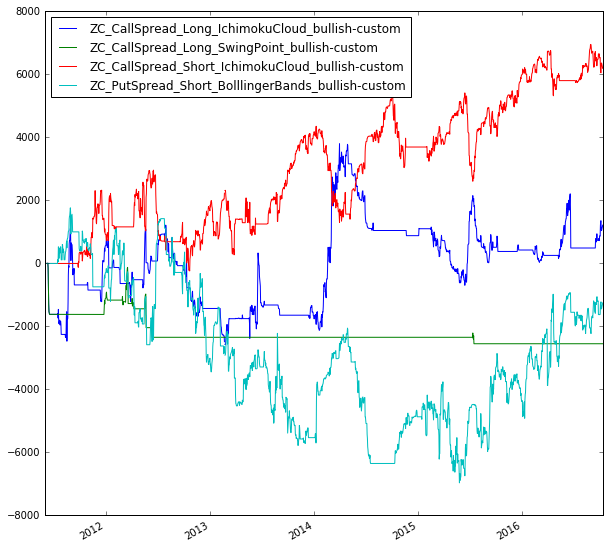

In [39]:
figsize(10,10)
campaign_portfolio.plot()

### Cumulative campaign equity

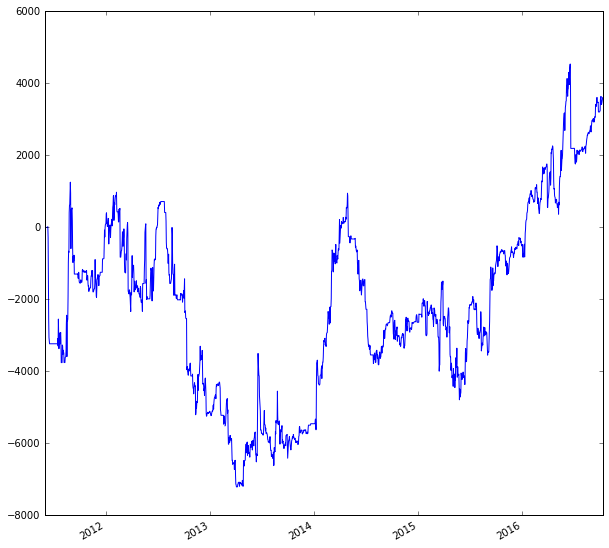

In [40]:
campaign_portfolio.sum(axis=1).plot()

# Campaign statistics

In [24]:
print(campaign_stats)

{'NetProfit': 0.0, 'TradesCount': 0, 'CommissionSum': 0.0}
